In [ ]:
i=10
j=0
def GenTest():
  print("reached start")
  # global i
  # global j
  i,j= 5,10
  while True:
    j+=i
    print("reached before yield")
    yield i,j
    print("reached after yield")
  j=i
  print("reached end")

In [ ]:
x= GenTest()
print(next(x))

reached start
reached before yield
(5, 15)


In [ ]:
print(next(x))

reached after yield
reached before yield
(5, 20)


In [ ]:
i=10
j=0
def GenTest():
  print("reached start")
  i,j= 5,10
  while True:
    j+=i
    print("reached before yield")
    print(i, j)
    yield i,j
    print("reached after yield")
    print(i, j)
  j=i
  print("reached end")
  
g = GenTest()
next(g)


reached start
reached before yield
5 15


(5, 15)

In [ ]:
gen = GenTest()
next(gen) # will print "reached before yield" and return (5, 15)
next(gen) # will print "reached after yield", then "reached before yield", and return (5, 20)


reached start
reached before yield
5 15
reached after yield
5 15
reached before yield
5 20


(5, 20)

Observation BYME: make a variable, everthing goes fine.

In [ ]:
import math
def factorials():
    print("Fn starts here")
    index = 0
    while True:
        print("statement before yield inside loop")
        yield math.factorial(index)
        index += 1
        print("statement after yield inside loop")
    print("statement after yield outside loop, fn ends here")

In [ ]:
facts = factorials()
for _ in range(3):
    print(next(facts))

Fn starts here
statement before yield inside loop
1
statement after yield inside loop
statement before yield inside loop
1
statement after yield inside loop
statement before yield inside loop
2


Doubt: Yield works fine here, just like pause and resume. Whats the issue with observation before this ?

# Section 7 : Iteration Tools

## Aggregators
Functions that iterate through an iterable and return a single value that (usually) takes into account every element of the iterable.

Defination byme check: Aggregator= fn that returns a single value

###Example
min(iterable) → minimum value in the iterable

all(iterable) → returns True if all the elements in iterable are truthy

continue from 74. Aggregators - Coding

## determine if something is a number
number = True for (int, float, Decimal, bool, complex etc...)
number = False for (str, list etc...)

In [ ]:
from numbers import Number
isinstance(2+3j, Number)


True

In [ ]:
from decimal import Decimal
isinstance(Decimal('10.3'), Number)

True

In [ ]:
isinstance('100', Number)

False

## using map function to typecast

In [ ]:
list(map(str, [0, 1, 2, 3, 4]))

['0', '1', '2', '3', '4']

we can also do this using generator expressions instead of map:


```
with open('car-brands.txt') as f:
    result = any(len(row) > 13 for row in f)
print(result)
```



completed reading till 02 - Slicing Iterables.ipynb, https://github.com/fbaptiste/python-deepdive/blob/main/Part%202/Section%2008%20-%20Iteration%20Tools/02%20-%20Slicing%20Iterables.ipynb

Continue from 03 - Selecting and Filtering.ipynb

Note: function that given an input returns True or False is called a predicate)

## filter function

filter(fn_permit, fn_value)

Working: fn_value will be executed and it's result will be passed to fn_permit, and if fn_permit returns true, value returned by the fn_value will be added to output of filter.

Note: filter function is also lazy.

Trick: first function filters the output of second fn inside the filter(first_fn, second_fn).

In [ ]:
def gen_cubes(n):
    for i in range(n):
        print(f'yielding {i}')
        yield i**3

def is_odd(x):
    return x % 2 == 1

In [ ]:
filtered = filter(is_odd, gen_cubes(10))
list(filtered)

yielding 0
yielding 1
yielding 2
yielding 3
yielding 4
yielding 5
yielding 6
yielding 7
yielding 8
yielding 9


[1, 27, 125, 343, 729]

## Takewhile and Dropwhile

### takewhile (function in itertools)

As soon as the predicate is False, iteration is stopped - even if subsequent elements would have had a True predicate - this is not a filter, this basically iterate over an iterable as long as the predicate remains True.

Trick: take while predicate returns true.

### Dropwhile
 The dropwhile function on the other hand 
starts the iteration once the predicate becomes False.

In [ ]:
from itertools import dropwhile
l = [1, 3, 5, 2, 1]
list(dropwhile(lambda x: x < 5, l))

[5, 2, 1]

## Compress and zip

In [ ]:
data = ['a', 'b', 'c', 'd', 'e']
selectors = [True, False, 1, 0]

In [ ]:
list(zip(data, selectors))

[('a', True), ('b', False), ('c', 1), ('d', 0)]

In [ ]:
from itertools import compress
list(compress(data, selectors))

['a', 'c']

The compress function works the same way, except that it is evaluated lazily and returns an iterator.


## Infinite Iterators

There are three functions in the itertools module that produce infinite iterators: count, cycle and repeat.

### count
The count function is similar to range, except it does not have a stop value. It has both a start and a step. Unlike the range function, whose arguments must always be integers, count works with floats, complex and decimal as well.

count(start,step)

### cycle
cycle is used to repeatedly loop over an iterable

In [ ]:


from itertools import cycle, islice
g = cycle(('red', 'green', 'blue'))

list(islice(g, 8))

['red', 'green', 'blue', 'red', 'green', 'blue', 'red', 'green']


### Repeat

The repeat function is used to create an iterator that just returns the same value again and again.

In [ ]:

from itertools import repeat 
g = repeat('Python')
for _ in range(5):
    print(next(g))

Python
Python
Python
Python
Python


In [ ]:
g = repeat('Python', 4)
list(g)

Note: repeat creates shallow copies (not deep copies) so be careful

##05 - Chaining and Teeing Iterators.ipynb

Chain simply means joining iterables

In [ ]:
# manually chaining
def chain_iterables(*iterables):
    for iterable in iterables:
        yield from iterable

In [ ]:
from itertools import chain

l1 = (i**2 for i in range(4))
String_1 = "Aditya"
l2 = (i**2 for i in range(4, 8))
l3 = (i**2 for i in range(8, 12))

for item in chain(l1, String_1, l2, l3):
    print(item)

0
1
4
9
A
d
i
t
y
a
16
25
36
49
64
81
100
121


We can use "tee" from itertools for deep copy.

### checking if object is an Iterator

In [ ]:
lists = [1, 2, 3, 100]

In [ ]:
lists is lists.__iter__()

False

In [ ]:
'__next__' in dir(lists)

False

In [ ]:
next(lists)

TypeError: ignored

## 06 - Mapping and Reducing.ipynb

### map and starmap

map(fn, list of input values) returns list of the output received b

In [ ]:
maps = map(lambda x: x**2, range(5))
list(maps)

[0, 1, 4, 9, 16]

Similarly, starmap just unpacks the elements when fn has multiple inputs

Here is an example where we should use starmap instead of map

In [ ]:
def add(x, y):
    return x + y
t = (2, 3)
add(*t)

5

In [ ]:
list(map(add, [(0,0), (1,1), (2,2)]))

TypeError: ignored

In [ ]:
from itertools import starmap
list(starmap(add, [(0,0), (1,1), (2,2)]))

[0, 2, 4]

Observation BYME:

                    map                           reduce
                    
single element   ----------------> list of objects -------------------------> single element

### Reduce

In [ ]:
from functools import reduce
reduce(lambda x, y: x*y, [1, 2, 3, 4])

24

In [ ]:
from itertools import accumulate
list(accumulate([10, 20, 30]))    # defaults to addition [10, 10+20, 10+20+30]

[10, 30, 60]

In [ ]:
import operator    # we can change the working of accumulate by passing functions. here we are using operator module instead of defining functions manually
list(accumulate([1, 2, 3, 4], operator.mul))   # output [1, 1*2, 1*2*3, 1*2*3*4]

[1, 2, 6, 24]

## 07 - Zipping.ipynb

In [ ]:
l1 = [1, 2, 3, 4, 5]
l2 = [11, 22, 33, 44]
l3 = [111, 222, 333]

list(zip(l1, l2, l3))   # Point to remember: zip is lazy

[(1, 11, 111), (2, 22, 222), (3, 33, 333)]

In [ ]:
from itertools import zip_longest
list(zip_longest(l1, l2, l3, fillvalue='N/A'))

[(1, 11, 111), (2, 22, 222), (3, 33, 333), (4, 44, 'N/A'), (5, 'N/A', 'N/A')]

In [ ]:
list(zip_longest(l1, l2, l3))

[(1, 11, 111), (2, 22, 222), (3, 33, 333), (4, 44, None), (5, None, None)]

Note: instructor said not to try the below code with zip_longest.
So, I am trying it.

In [ ]:
def squares():
    i = 0
    while True:
        yield i ** 2
        i += 1

def cubes():
    i = 0
    while True:
        yield i ** 3
        i += 1

In [ ]:
iter1 = squares()
iter2 = cubes()
list(zip(range(10), iter1, iter2))

[(0, 0, 0),
 (1, 1, 1),
 (2, 4, 8),
 (3, 9, 27),
 (4, 16, 64),
 (5, 25, 125),
 (6, 36, 216),
 (7, 49, 343),
 (8, 64, 512),
 (9, 81, 729)]

In [ ]:
list(zip_longest(range(10), iter1, iter2))

The above zip_longest crashed.

the output does not stop at range 10, it continues till infinity, and fills none in place of range 10, after filling 0 to 9.

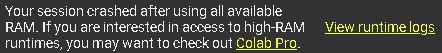

## 08 - Grouping

In [ ]:
import itertools
x = ["a",0,1, (24,36,25)]
for element in itertools.islice(x,1,4):
  print(element)

0
1
(24, 36, 25)


In [ ]:
for element in x[1:4]:
  print(element)

0
1
(24, 36, 25)


### BYME: Simple comparision of itertools.islice VS [] slice

1. islice is lazy. (good for memory, computution time and is able to generate infinitely). While, Traditional slicing can't slice infinite iterators, since it generates the whole slice at once. (Traditional slicing is not lazy)
2. islice can't slice backwards, while traditional slicing is good with both the directions



## groupby (works like sql)

In [ ]:
data = (1, 1, 2, 2, 3, 6, 11, 6, 25, 25)
list(itertools.groupby(data))

[(1, <itertools._grouper at 0x7f8cb47528b0>),
 (2, <itertools._grouper at 0x7f8cb4752070>),
 (3, <itertools._grouper at 0x7f8cb47523d0>),
 (6, <itertools._grouper at 0x7f8cb4752eb0>),
 (11, <itertools._grouper at 0x7f8cb47528e0>),
 (6, <itertools._grouper at 0x7f8cb4752460>),
 (25, <itertools._grouper at 0x7f8cb4752df0>)]

In [ ]:
it = itertools.groupby(data)  ## consecutive same values ka group bana diya
for group in it:
    print(group[0], list(group[1]))  

1 [1, 1]
2 [2, 2]
3 [3]
6 [6]
11 [11]
6 [6]
25 [25, 25]


### Using key to group


In [ ]:
data = (
    (1, 'abc'),
    (1, 'bcd'),
   
    (2, 'pyt'),
    (2, 'yth'),
    (2, 'tho'),
    
    (3, 'hon')
)

groups = itertools.groupby(data, key=lambda x: x[0]+21)   ## using first element as a key to group (key works just like sorted)
for group in groups:
    print(group[0], list(group[1]))

22 [(1, 'abc'), (1, 'bcd')]
23 [(2, 'pyt'), (2, 'yth'), (2, 'tho')]
24 [(3, 'hon')]


*Continue from In[9]*
https://github.com/fbaptiste/python-deepdive/blob/main/Part%202/Section%2008%20-%20Iteration%20Tools/08%20-%20Grouping/Grouping.ipynb



observation BYME: 

1.   groupby returns [(key1, lazy_grouper_object_1,  ....)]
2.   list(lazy_grouper_object_1) returns list of elements grouped by key1

it basically iterates over all the elements until it hits the next group key.
ONCE KEY CHANGES, previous list of elements get exhausted.
So, store values in list if needed in future.


## 09 - Combinatorics.ipynb

Permutations: (a,b) and (b,a) are different permutations

Combinations: (a,b) and (b,a) mean the same.

Start from Section 9 (deepdive part 2)

#Section 9: Project 4

##Project Description
For this project you have 4 files containing information about persons.

The files are:

* personal_info.csv - personal information such as name, gender, etc. (one row per person)
* vehicles.csv - what vehicle people own (one row per person)
* employment.csv - where a person is employed (one row per person)
* update_status.csv - when the person's data was created and last updated
Each file contains a key, SSN, which uniquely identifies a person.

This key is present in all four files.

You are guaranteed that the same SSN value is present in every file, and that it only appears once per file.

In addition, the files are all sorted by SSN, i.e. the SSN values appear in the same order in each file.

##Goal 1
Your first task is to create iterators for each of the four files that contained cleaned up data, of the correct type (e.g. string, int, date, etc), and represented by a named tuple.

For now these four iterators are just separate, independent iterators.

***BYME: Just fetch data from files and store it into namedtuple***

Syntax Revision

```
tupleName = collections.namedtuple(class_name, fields)  ---> created named tuple
x = tupleName(value1, value2, ...)                      ---> added values to respective fields
x[0], x.value1                                          ---> ways of accessing data
dateVar = datetime.strptime(value, fmt) # here format fmt='%Y-%m-%dT%H:%M:%SZ'
```

Proper way to write code for getting csv from url:


```
import requests
import csv

url = employment_csv_url
response = requests.get(url)

lines = response.content.decode().splitlines()

reader = csv.reader(lines)
for row in reader:
    print(row)
```
Output:


```
['employer', 'department', 'employee_id', 'ssn']
['Stiedemann-Bailey', 'Research and Development', '29-0890771', '100-53-9824']
['Nicolas and Sons', 'Sales', '41-6841359', '101-71-4702']
['Connelly Group', 'Research and Development', '98-7952860', '101-84-0356']
['Upton LLC', 'Marketing', '56-9817552', '104-22-0928']
['Zemlak-Olson', 'Business Development', '46-2886707', '104-84-7144']
['Kohler, Bradtke and Davis', 'Support', '80-0975518', '105-27-5541']
['Roberts, Torphy and Dach', 'Human Resources', '77-4895332', '105-85-7486']
['Lind-Jast', 'Marketing', '79-6418731', '105-91-5022']
```






In [ ]:
import requests
import csv
import collections

employment_csv_url = "https://raw.githubusercontent.com/fbaptiste/python-deepdive/main/Part%202/Section%2009%20-%20Project%204/project_4_description/employment.csv"
personal_info_csv_url = "https://raw.githubusercontent.com/fbaptiste/python-deepdive/main/Part%202/Section%2009%20-%20Project%204/project_4_description/personal_info.csv"
update_status_csv_url = "https://raw.githubusercontent.com/fbaptiste/python-deepdive/main/Part%202/Section%2009%20-%20Project%204/project_4_description/update_status.csv"
vehicles_csv_url = "https://raw.githubusercontent.com/fbaptiste/python-deepdive/main/Part%202/Section%2009%20-%20Project%204/project_4_description/vehicles.csv"

In [ ]:
# reading elements lazily
def extract_values_in_row(url):
  response = requests.get(url)
  lines = response.content.decode().splitlines()
  reader = csv.reader(lines)
  yield from reader
  # returns list of elements in the row as string

In [ ]:
import datetime
def parser(inputNamedTuple, typeCheck = False):
  parsedList = []
  for value in inputNamedTuple:
    try:
      parsedList.append(int(value))
    except ValueError:
      try:
        fmt='%Y-%m-%dT%H:%M:%SZ'
        parsedList.append(datetime.datetime.strptime(value, fmt))
      except:
        parsedList.append(value)

  # for element in parsedList:
  #   print(element, type(element))

  if typeCheck:
    print('input value type:', type(inputNamedTuple))
    print('output value type:', type(inputNamedTuple._make(parsedList)))

  return inputNamedTuple._make(parsedList)

Note BYME: USE OF MAKE ENSURED THAT THE ELEMENT IS OF SAME TYPE AS INPUT NAMEDTUPLE IN ABOVE CODE

In [ ]:
# first working on employment csv
employment_rows = extract_values_in_row(employment_csv_url)    # since first row is header
employment_data = collections.namedtuple("employment_data_class", next(employment_rows))   # extracted first row (header) to use as a field in employment_data

In [ ]:
# then working on personal_info csv
personal_info_rows = extract_values_in_row(personal_info_csv_url)
personal_info_data = collections.namedtuple("personal_info_data_class", next(personal_info_rows))   # extracted first row (header) to use as a field in personal_info_data

In [ ]:
# then working on update_status csv
update_status_rows = extract_values_in_row(update_status_csv_url)
update_status_data = collections.namedtuple("update_status_data_class", next(update_status_rows))   # extracted first row (header) to use as a field in update_status_data

In [ ]:
# at last working on vehicles csv
vehicles_rows = extract_values_in_row(vehicles_csv_url)
vehicles_data = collections.namedtuple("vehicles_data_class", next(vehicles_rows))   # extracted first row (header) to use as a field in vehicles_data

In [ ]:
employment_data.__class__.__name__

'type'

In [ ]:
type(employment_data)

type

### Above is code for goal 1 and below is checking if data is available 

In [ ]:
''' TEST EMPLOYMENT DATA BY ACCESSING (DONT RUN THIS MULTIPLE TIMES AS emolyment_rows GETS EXHAUSTED ONCE IT IS USED) '''


# Create instances of the named tuple class and store them in a list
employment_data_list = [parser(employment_data(*row)) for row in employment_rows]
'''
explanation of above:
employment_rows = list of row data in str type
so, employment_data_list is list of named tuples of each row in sequence
'''

# Access the ssn value of the first row in the list
print(employment_data_list[0].employer)
print(employment_data_list[0].department)
print(employment_data_list[0].employee_id)
print(employment_data_list[0].ssn)

Stiedemann-Bailey
Research and Development
29-0890771
100-53-9824


In [ ]:
''' TEST PERSONAL INFO DATA BY ACCESSING (DONT RUN THIS MULTIPLE TIMES) '''


# Create instances of the named tuple class and store them in a list
personal_info_data_list = [parser(personal_info_data(*row)) for row in personal_info_rows]
'''
explanation of above:
personal_info_rows = list of row data in str type
so, personal_info_data_list is list of named tuples of each row in sequence
'''

# Access the ssn value of the first row in the list
			
print(personal_info_data_list[0].ssn)
print(personal_info_data_list[0].first_name)
print(personal_info_data_list[0].last_name)
print(personal_info_data_list[0].gender)
print(personal_info_data_list[0].language)

100-53-9824
Sebastiano
Tester
Male
Icelandic


In [ ]:
''' TEST UPDATE STATUS DATA BY ACCESSING (DONT RUN THIS MULTIPLE TIMES) '''


# Create instances of the named tuple class and store them in a list
update_status_data_list = [parser(update_status_data(*row)) for row in update_status_rows]
'''
explanation of above:
update_status_rows = list of row data in str type
so, update_status_data_list is list of named tuples of each row in sequence
'''

# Access the ssn value of the first row in the list
print(update_status_data_list[0].ssn)
print(update_status_data_list[0].last_updated)
print(update_status_data_list[0].created)

100-53-9824
2017-10-07 00:14:42
2016-01-24 21:19:30


In [ ]:
''' TEST VEHICLES DATA BY ACCESSING (DONT RUN THIS MULTIPLE TIMES) '''


# Create instances of the named tuple class and store them in a list
vehicles_data_list = [parser(vehicles_data(*row)) for row in vehicles_rows]
'''
explanation of above:
vehicles_rows = list of row data in str type
so, vehicles_data_list is list of named tuples of each row in sequence
'''

# Access the ssn value of the first row in the list
print(vehicles_data_list[0].ssn)
print(vehicles_data_list[0].vehicle_make)
print(vehicles_data_list[0].vehicle_model)
print(vehicles_data_list[0].model_year)

100-53-9824
Oldsmobile
Bravada
1993


In [ ]:
print(print(vehicles_data_list[1].model_year))

1997
None


## Goal 2

Create a single iterable that combines all the columns from all the iterators.

The iterable should yield named tuples containing all the columns. Make sure that the SSN's across the files match!

All the files are guaranteed to be in SSN sort order, and every SSN is unique, and every SSN appears in every file.

Make sure the SSN is not repeated 4 times - one time per row is enough!


***BYME: data is same line by line, just create a named tuple with all the columns side by side.***

In [ ]:
# Created combined tuple

all_fields = tuple(set(employment_data._fields + personal_info_data._fields + update_status_data._fields + vehicles_data._fields))
# type casted to set for removing repeated elements, then type casted to tuple to preserve sequence

print("all_fields =", all_fields) ##########
combined_namedtuple_data = collections.namedtuple("combined_type", all_fields)

all_fields = ('ssn', 'vehicle_make', 'employee_id', 'created', 'first_name', 'employer', 'department', 'model_year', 'last_updated', 'last_name', 'language', 'vehicle_model', 'gender')


###Revision of zip:
Code:


```
data = ['a', 'b', 'c', 'd', 'e']
selectors = [True, False, 1, 0]
list(zip(data, selectors))
```
Output:


```
[('a', True), ('b', False), ('c', 1), ('d', 0)]
```





In [ ]:
# adding values to combined tuple, and then creating a list of those

combined_namedtuple_data_list = []  # empty list to hold combined data

for emp, per, upd, veh in zip(employment_data_list, personal_info_data_list, update_status_data_list, vehicles_data_list):
    row = []
    for field in all_fields:
        if field in employment_data._fields:
            row.append(getattr(emp, field))
        elif field in personal_info_data._fields:
            row.append(getattr(per, field))
        elif field in update_status_data._fields:
            row.append(getattr(upd, field))
        elif field in vehicles_data._fields:
            row.append(getattr(veh, field))
    combined_namedtuple_data_list.append(combined_namedtuple_data(*row))

In [ ]:
# printing to check if data is combined (VERIFIED !)
for _ in combined_namedtuple_data_list:
  print(_)

combined_type(ssn='100-53-9824', vehicle_make='Oldsmobile', employee_id='29-0890771', created=datetime.datetime(2016, 1, 24, 21, 19, 30), first_name='Sebastiano', employer='Stiedemann-Bailey', department='Research and Development', model_year=1993, last_updated=datetime.datetime(2017, 10, 7, 0, 14, 42), last_name='Tester', language='Icelandic', vehicle_model='Bravada', gender='Male')
combined_type(ssn='101-71-4702', vehicle_make='Ford', employee_id='41-6841359', created=datetime.datetime(2016, 1, 27, 4, 32, 57), first_name='Cayla', employer='Nicolas and Sons', department='Sales', model_year=1997, last_updated=datetime.datetime(2017, 1, 23, 11, 23, 17), last_name='MacDonagh', language='Lao', vehicle_model='Mustang', gender='Female')
combined_type(ssn='101-84-0356', vehicle_make='GMC', employee_id='98-7952860', created=datetime.datetime(2016, 9, 21, 23, 4, 7), first_name='Nomi', employer='Connelly Group', department='Research and Development', model_year=2005, last_updated=datetime.datet

In [ ]:
print("Total",len(combined_namedtuple_data_list),"records")

Total 1000 records


## Goal 3
Next, you want to identify any stale records, where stale simply means the record has not been updated since 3/1/2017 (e.g. last update date < 3/1/2017). Create an iterator that only contains current records (i.e. not stale) based on the last_updated field from the status_update file.

In [ ]:
def current_records():
  for row in combined_namedtuple_data_list:
    if (row.last_updated >= datetime.datetime.strptime("3/1/2017-00:00:00", '%d/%m/%Y-%H:%M:%S')):
      yield row

In [ ]:
current_records_list = [_ for _ in current_records()]
len(current_records_list)

997

## Goal 4
Find the largest group of car makes for each gender.

Possibly more than one such group per gender exists (equal sizes).

BYME: if male: male[car_make] ++, else female[car_make_] ++

In [ ]:
def max_car_maker(allRecords, gender):
  max_car_maker_dict = {}
  for record in allRecords:
    if getattr(record, "gender") == gender:
      try:
        max_car_maker_dict[getattr(record, "vehicle_make")] += 1
      except KeyError:
        max_car_maker_dict[getattr(record, "vehicle_make")] = 1
  print(gender, max_car_maker_dict)
  return max(max_car_maker_dict, key = lambda x: max_car_maker_dict[x])

In [ ]:
male_car_maker = max_car_maker(combined_namedtuple_data_list ,"Male")
female_car_maker = max_car_maker(combined_namedtuple_data_list ,"Female")

print("\n\n", male_car_maker, female_car_maker)

Male {'Oldsmobile': 6, 'Ford': 44, 'GMC': 31, 'Volkswagen': 19, 'Aston Martin': 4, 'Mercedes-Benz': 23, 'Buick': 17, 'Audi': 17, 'Isuzu': 3, 'Acura': 10, 'Pontiac': 13, 'Jaguar': 5, 'Chevrolet': 38, 'Dodge': 25, 'Infiniti': 9, 'Mitsubishi': 29, 'Plymouth': 5, 'Subaru': 8, 'Lincoln': 7, 'Cadillac': 11, 'Toyota': 26, 'Mazda': 14, 'Volvo': 10, 'Jeep': 7, 'Maserati': 5, 'Mercury': 12, 'BMW': 12, 'Hyundai': 10, 'Chrysler': 3, 'Lexus': 8, 'Kia': 6, 'Saturn': 3, 'Maybach': 2, 'Honda': 10, 'Nissan': 7, 'Scion': 1, 'Bentley': 3, 'Saab': 8, 'Jensen': 1, 'Smart': 1, 'Porsche': 5, 'Land Rover': 3, 'Suzuki': 5, 'Panoz': 2, 'Hummer': 1, 'Rolls-Royce': 2, 'Lamborghini': 4, 'Geo': 2, 'Corbin': 1, 'Lotus': 5, 'Daewoo': 1, 'Aptera': 1, 'Eagle': 1, 'Austin': 1}
Female {'Ford': 48, 'GMC': 23, 'Chrysler': 8, 'Isuzu': 3, 'Chevrolet': 48, 'Bugatti': 1, 'Scion': 3, 'Rolls-Royce': 2, 'Plymouth': 4, 'Cadillac': 6, 'Lexus': 17, 'Porsche': 5, 'Jeep': 6, 'BMW': 13, 'Lotus': 7, 'Land Rover': 9, 'Toyota': 24, 'Mercu

#Section 10 - Context Managers

## 01 - Context Managers in Python.ipynb

Exmple of context manager use:


```
with open(fileName) as f:
  ...
  ...
```


There is a general pattern that context managers can help us deal with:

    Open - Close
    Lock - Release
    Change - Reset
    Enter - Exit
    Start - Stop


In [ ]:
class context_work_tracer:
  def __init__(self, input_string):
    self.s = input_string
    print("__init__")

  def __enter__(self):
    print("__enter__ needs atlest self in input")
    return self # this thing returned will get in "as"
    '''
    example: if __enter__ returns self.obj
              and "with context_work_tracer("abcd") as f:" is used
              the value of self.obj will be returned in f

              f = self.obj 
              but, if f.obj does not exit  (i.e. self.obj.obj does not exist),
              f.obj returns value of self.obj
    '''

  def __exit__(self, exc_type, exc_value, exc_tb):
    # exc_type = exception type
    # exc_value = exception value
    # exc_tb = excepion traceback
    print("__exit__ needs atleast these 4 args (self, exc_type, exc_value, exc_tb)")
    '''
    if __exit__ returns True  : exceptions inside context manager are supressed  : True means  (yes supress)
    if __exit__ returns False : exceptions inside context manager works as usual : False means (no do not supress)
    '''

In [ ]:
with context_work_tracer("Aditya"):
  print("logic inside with")

__init__
__enter__ needs atlest self in input
logic inside with
__exit__ needs atleast these 4 args (self, exc_type, exc_value, exc_tb)


In [ ]:
with open("Aditya.txt","w") as f:
  print("inside with: file.closed =", f.closed)
print("outside with: file.closed =", f.closed)

inside with: file.closed = False
outside with: file.closed = True


Note that the __enter__ method can return anything, including the context manager itself. Below code shows it returning context manager (self)

In [ ]:
class MyContextManager:
    def __enter__(self):
        print("Entering context")
        return self

    def __exit__(self, exc_type, exc_value, traceback):
        print("Exiting context")

with MyContextManager() as cm:
    print("Inside context")
    print("-------------------------------")
    print(cm is cm.__enter__())  # Output: True
    print("-------------------------------")

Entering context
Inside context
-------------------------------
Entering context
True
-------------------------------
Exiting context


## 02 - Caveat with Lazy Iterators

### Case 1: data can be accessed outside context manager. WHY ?

In [ ]:
import csv
import requests
url = "https://raw.githubusercontent.com/fbaptiste/python-deepdive/main/Part%202/Section%2010%20-%20Context%20Managers/02%20-%20Caveat%20with%20Lazy%20Iterators/nyc_parking_tickets_extract.csv"

def read_data(_url):
    with requests.get(_url) as response:
        return csv.reader(response.content.decode().splitlines())

for row in read_data(url):
    print(row)

['Summons Number', 'Plate ID', 'Registration State', 'Plate Type', 'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make', 'Violation Description']
['4006478550', 'VAD7274', 'VA', 'PAS', '10/5/2016', '5', '4D', 'BMW', 'BUS LANE VIOLATION']
['4006462396', '22834JK', 'NY', 'COM', '9/30/2016', '5', 'VAN', 'CHEVR', 'BUS LANE VIOLATION']
['4007117810', '21791MG', 'NY', 'COM', '4/10/2017', '5', 'VAN', 'DODGE', 'BUS LANE VIOLATION']
['4006265037', 'FZX9232', 'NY', 'PAS', '8/23/2016', '5', 'SUBN', 'FORD', 'BUS LANE VIOLATION']
['4006535600', 'N203399C', 'NY', 'OMT', '10/19/2016', '5', 'SUBN', 'FORD', 'BUS LANE VIOLATION']
['4007156700', '92163MG', 'NY', 'COM', '4/13/2017', '5', 'VAN', 'FRUEH', 'BUS LANE VIOLATION']
['4006687989', 'MIQ600', 'SC', 'PAS', '11/21/2016', '5', 'VN', 'HONDA', 'BUS LANE VIOLATION']
['4006943052', '2AE3984', 'MD', 'PAS', '2/1/2017', '5', 'SW', 'LINCO', 'BUS LANE VIOLATION']
['4007306795', 'HLG4926', 'NY', 'PAS', '5/30/2017', '5', 'SUBN', 'TOYOT', 'BUS LANE

### Case 2: data can be accessed outside context manager. WHY ?

In [ ]:
class MyContextManager:
    def __init__(self, _str):
        self.data = "data is confidential"
        self._str = _str
        print("__init__ executed")

    def __enter__(self):
        print("Entering context")
        return self

    def __exit__(self, exc_type, exc_value, traceback):
        print("Exiting context")


# m = MyContextManager("Adi")
def read_data():
    with MyContextManager("Adi") as my:
        return my.data

for row in read_data():
    print(row)

__init__ executed
Entering context
Exiting context
d
a
t
a
 
i
s
 
c
o
n
f
i
d
e
n
t
i
a
l


### Unresolved Doubt: 
Why is this data printed after exiting context ?
It should not be available to use after exiting context.

###INCORRECT SOLUTION
Solution from internet: 

The 'with' statement only controls the creation and destruction of the context, but it does not affect the state of the context manager or its data.

In other words, when you exit the context, the MyContextManager object is destroyed, but the data attribute still exists in memory until it is garbage collected. When you return the my.data value from the with statement, you are simply returning the value of the data attribute, which still exists in memory.

In [ ]:
# Another code to achieve the privacy we need (delete data mannually when exiting context)
class MyContextManager:
    def __init__(self, _str):
        self.data = "data is confidential"
        self._str = _str
        print("__init__ executed")

    def __enter__(self):
        print("Entering context")
        return self

    def __exit__(self, exc_type, exc_value, traceback):
        print("Exiting context")
        del self.data

def read_data():
    with MyContextManager("Adi") as my:
        return my.data

read_data()

__init__ executed
Entering context
Exiting context


'data is confidential'

### Case 3: data cannot be accessed outside context manager. WHY ?
####Similar code to case 1

In [ ]:
# creating file
f1 = open('nyc_parking_tickets_extract.csv', 'w')
f1.writelines('''Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Description
4006478550,VAD7274,VA,PAS,10/5/2016,5,4D,BMW,BUS LANE VIOLATION
4006462396,22834JK,NY,COM,9/30/2016,5,VAN,CHEVR,BUS LANE VIOLATION
4007117810,21791MG,NY,COM,4/10/2017,5,VAN,DODGE,BUS LANE VIOLATION
4006265037,FZX9232,NY,PAS,8/23/2016,5,SUBN,FORD,BUS LANE VIOLATION
4006535600,N203399C,NY,OMT,10/19/2016,5,SUBN,FORD,BUS LANE VIOLATION
4007156700,92163MG,NY,COM,4/13/2017,5,VAN,FRUEH,BUS LANE VIOLATION
4006687989,MIQ600,SC,PAS,11/21/2016,5,VN,HONDA,BUS LANE VIOLATION
4006943052,2AE3984,MD,PAS,2/1/2017,5,SW,LINCO,BUS LANE VIOLATION''')
f1.close()

In [ ]:
import csv

def read_data():
    with open('nyc_parking_tickets_extract.csv') as f:
        return csv.reader(f, delimiter=',', quotechar='"')

for row in read_data():
    print(row)

ValueError: ignored

### Doubt:
Why does this second case (open) work fine, but the first case (MyContextManager) does not ? 

### Somewhat satisfactory solution
In Case 1, the requests.get() method returns an HTTP response object that doesn't have a .close() method, so there's no way to close it manually. The response object is automatically closed when the with block ends, but until then, the response object is still available and the data can be accessed outside of the with block.

In Case 3, the file object returned by the open() function does have a .close() method, which is called automatically when the with block ends. After the file is closed, any attempt to read from it will raise a ValueError: I/O operation on closed file. error.

Regarding your last question, if a context manager doesn't have a way of closing the resources it manages, then the data will be available outside the context manager as long as the resources remain open. However, it's generally a good practice to define a way of closing the resources in a context manager to ensure that they're always properly closed and to avoid resource leaks or other problems.

In [ ]:
class DataIterator:
    def __init__(self, fname):
        print("__init__")
        self._fname = fname
        self._f = None
    
    def __iter__(self):
        print("__iter__")
        return self
    
    def __next__(self):
        print("__next__")
        row = next(self._f)
        return row.strip('\n').split(',')
    
    def __enter__(self):
        print("__enter__")
        self._f = open(self._fname)
        return self
    
    def __exit__(self, exc_type, exc_value, exc_tb):
        print("__exit__")
        if not self._f.closed:
            self._f.close()
        return False

In [ ]:
with DataIterator('nyc_parking_tickets_extract.csv') as data:
    for row in data:
        print(row)

__init__
__enter__
__iter__
__next__
['Summons Number', 'Plate ID', 'Registration State', 'Plate Type', 'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make', 'Violation Description']
__next__
['4006478550', 'VAD7274', 'VA', 'PAS', '10/5/2016', '5', '4D', 'BMW', 'BUS LANE VIOLATION']
__next__
['4006462396', '22834JK', 'NY', 'COM', '9/30/2016', '5', 'VAN', 'CHEVR', 'BUS LANE VIOLATION']
__next__
['4007117810', '21791MG', 'NY', 'COM', '4/10/2017', '5', 'VAN', 'DODGE', 'BUS LANE VIOLATION']
__next__
['4006265037', 'FZX9232', 'NY', 'PAS', '8/23/2016', '5', 'SUBN', 'FORD', 'BUS LANE VIOLATION']
__next__
['4006535600', 'N203399C', 'NY', 'OMT', '10/19/2016', '5', 'SUBN', 'FORD', 'BUS LANE VIOLATION']
__next__
['4007156700', '92163MG', 'NY', 'COM', '4/13/2017', '5', 'VAN', 'FRUEH', 'BUS LANE VIOLATION']
__next__
['4006687989', 'MIQ600', 'SC', 'PAS', '11/21/2016', '5', 'VN', 'HONDA', 'BUS LANE VIOLATION']
__next__
['4006943052', '2AE3984', 'MD', 'PAS', '2/1/2017', '5', 'SW', 'LINC

### Super important sequence BYME:


1.   __init__
2.   __enter__
3.   __iter__
4.   __next__
5.   (INSIDE with Context manager)
6.   __next__
(after __next__ is called after every iteration of 5., and this cycle between  and 6. is repeated till __next__ returns STOP ITERATION 
7.   __exit__



## 04 - Additional Uses.ipynb

### Context in decimal

In [ ]:
import decimal

decimal.getcontext().prec = 4
print(decimal.Decimal(1) / decimal.Decimal(3))
decimal.getcontext().prec = 28
print(decimal.Decimal(1) / decimal.Decimal(3))

0.3333
0.3333333333333333333333333333


other uses were timers, html tags, etc....

## 05 - Generators and Context Managers.ipynb

Let's see how we might write something that almost behaves like a context manager, using a generator function:

In [ ]:
def my_gen():
    try:
        print('creating context and yielding object')
        lst = [1, 2, 3, 4, 5]
        yield lst
    finally:
        print('exiting context and cleaning up')

In [ ]:
gen = my_gen()
lst = next(gen)
print(lst)
try:
    next(gen)
except StopIteration:
    pass

creating context and yielding object
[1, 2, 3, 4, 5]
exiting context and cleaning up


### Similar example

In [ ]:
class GenCtxManager:
    def __init__(self, gen_func, *args, **kwargs):
        self._gen = gen_func(*args, **kwargs)
        
    def __enter__(self):
        return next(self._gen)
    
    def __exit__(self, exc_type, exc_value, exc_tb):
        try:
            next(self._gen)
        except StopIteration:
            pass
        return False

In [ ]:
def open_file(fname, mode):
    try:
        print('opening file...')
        f = open(fname, mode)
        yield f
    finally:
        print('closing file...')
        f.close()

In [ ]:
with GenCtxManager(open_file, 'test.txt', 'w') as f:
    print('writing to file...')
    f.write('testing...')

opening file...
writing to file...
closing file...


In [ ]:
with open('test.txt') as f:
    print(next(f))

testing...


## 06 - The contextmanager Decorator.ipynb



Recall the basic structure our generator function needs to have:



```
def gen(args):
    # set up happens here, or inside try (__init__ code here)
    try:
        yield obj # whatever normally gets returned by __enter__
    finally:
        # perform clean up code here (since, finally runs always, so we use this space to write __exit__ code.
```

#### Revision of Decorators

In [ ]:
def my_decorator(func):
    def wrapper():
        print("Before function is called.")
        func()
        print("After function is called.")
    return wrapper

@my_decorator
def say_hello():
    print("Hello!")

say_hello()

Before function is called.
Hello!
After function is called.


### Simple Context Manager decoractor using generator

In [ ]:
# creating file
f1 = open('nyc_parking_tickets_extract.csv', 'w')
f1.writelines('''Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Description
4006478550,VAD7274,VA,PAS,10/5/2016,5,4D,BMW,BUS LANE VIOLATION
4006462396,22834JK,NY,COM,9/30/2016,5,VAN,CHEVR,BUS LANE VIOLATION
4007117810,21791MG,NY,COM,4/10/2017,5,VAN,DODGE,BUS LANE VIOLATION
4006265037,FZX9232,NY,PAS,8/23/2016,5,SUBN,FORD,BUS LANE VIOLATION
4006535600,N203399C,NY,OMT,10/19/2016,5,SUBN,FORD,BUS LANE VIOLATION
4007156700,92163MG,NY,COM,4/13/2017,5,VAN,FRUEH,BUS LANE VIOLATION
4006687989,MIQ600,SC,PAS,11/21/2016,5,VN,HONDA,BUS LANE VIOLATION
4006943052,2AE3984,MD,PAS,2/1/2017,5,SW,LINCO,BUS LANE VIOLATION''')
f1.close()

In [ ]:
class GenContextManager:
    def __init__(self, gen):
        self.gen = gen
        
    def __enter__(self):
        return next(self.gen)
        
    def __exit__(self, exc_type, exc_value, exc_tb):
        print('calling next to perform cleanup in generator')
        try:
            next(self.gen)
        except StopIteration:
            pass
        return False

In [ ]:
def context_manager_dec(gen_fn):
    def helper(*args, **kwargs):
        gen = gen_fn(*args, **kwargs)
        ctx = GenContextManager(gen)
        return ctx
    return helper

In [ ]:
@context_manager_dec
def open_file(fname, mode='r'):
    print('opening file...')
    f = open(fname, mode)
    try:
        yield f
    finally:
        print('closing file...')
        f.close()    

In [ ]:
with open_file('nyc_parking_tickets_extract.csv') as f:
    print(f.readlines())

opening file...
['Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Description\n', '4006478550,VAD7274,VA,PAS,10/5/2016,5,4D,BMW,BUS LANE VIOLATION\n', '4006462396,22834JK,NY,COM,9/30/2016,5,VAN,CHEVR,BUS LANE VIOLATION\n', '4007117810,21791MG,NY,COM,4/10/2017,5,VAN,DODGE,BUS LANE VIOLATION\n', '4006265037,FZX9232,NY,PAS,8/23/2016,5,SUBN,FORD,BUS LANE VIOLATION\n', '4006535600,N203399C,NY,OMT,10/19/2016,5,SUBN,FORD,BUS LANE VIOLATION\n', '4007156700,92163MG,NY,COM,4/13/2017,5,VAN,FRUEH,BUS LANE VIOLATION\n', '4006687989,MIQ600,SC,PAS,11/21/2016,5,VN,HONDA,BUS LANE VIOLATION\n', '4006943052,2AE3984,MD,PAS,2/1/2017,5,SW,LINCO,BUS LANE VIOLATION']
calling next to perform cleanup in generator
closing file...


### Context manager Using standard library 
in fact that was one of the critical goals of Python's context managers - the ability to create context managers using generator functions (see PEP 343).

In [ ]:
from contextlib import contextmanager

In [ ]:
@contextmanager
def open_file(fname, mode='r'):
    print('opening file...')
    f = open(fname, mode)
    try:
        yield f
    finally:
        print('closing file...')
        f.close() 

In [ ]:
with open_file('nyc_parking_tickets_extract.csv') as f:
    print(f.readlines())

opening file...
['Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Description\n', '4006478550,VAD7274,VA,PAS,10/5/2016,5,4D,BMW,BUS LANE VIOLATION\n', '4006462396,22834JK,NY,COM,9/30/2016,5,VAN,CHEVR,BUS LANE VIOLATION\n', '4007117810,21791MG,NY,COM,4/10/2017,5,VAN,DODGE,BUS LANE VIOLATION\n', '4006265037,FZX9232,NY,PAS,8/23/2016,5,SUBN,FORD,BUS LANE VIOLATION\n', '4006535600,N203399C,NY,OMT,10/19/2016,5,SUBN,FORD,BUS LANE VIOLATION\n', '4007156700,92163MG,NY,COM,4/13/2017,5,VAN,FRUEH,BUS LANE VIOLATION\n', '4006687989,MIQ600,SC,PAS,11/21/2016,5,VN,HONDA,BUS LANE VIOLATION\n', '4006943052,2AE3984,MD,PAS,2/1/2017,5,SW,LINCO,BUS LANE VIOLATION']
closing file...


### IN SHORT BYME
Simply write @context manager at the while defining the fn
and then use "with" to call that.
(Look at above example) 

### Note:
We can also write to a file like below method:


```
    file = open(fname, 'w')
    sys.stdout = file
    file.close()
```

The contextlib module actually implements a stdout redirect context manager (shown below)

In [ ]:
from contextlib import redirect_stdout

with open('test.txt', 'w') as f:
    with redirect_stdout(f):
        print('Look on the bright side of life')

with open('test.txt') as f:
    print(f.readlines())

['Look on the bright side of life\n']


## 07 - Nested Context Managers
Link: https://github.com/fbaptiste/python-deepdive/blob/main/Part%202/Section%2010%20-%20Context%20Managers/07%20-%20Nested%20Context%20Managers/Nested%20Context%20Managers.ipynb


continue for IN [8]

### Revision BYME: else with try--except--finally

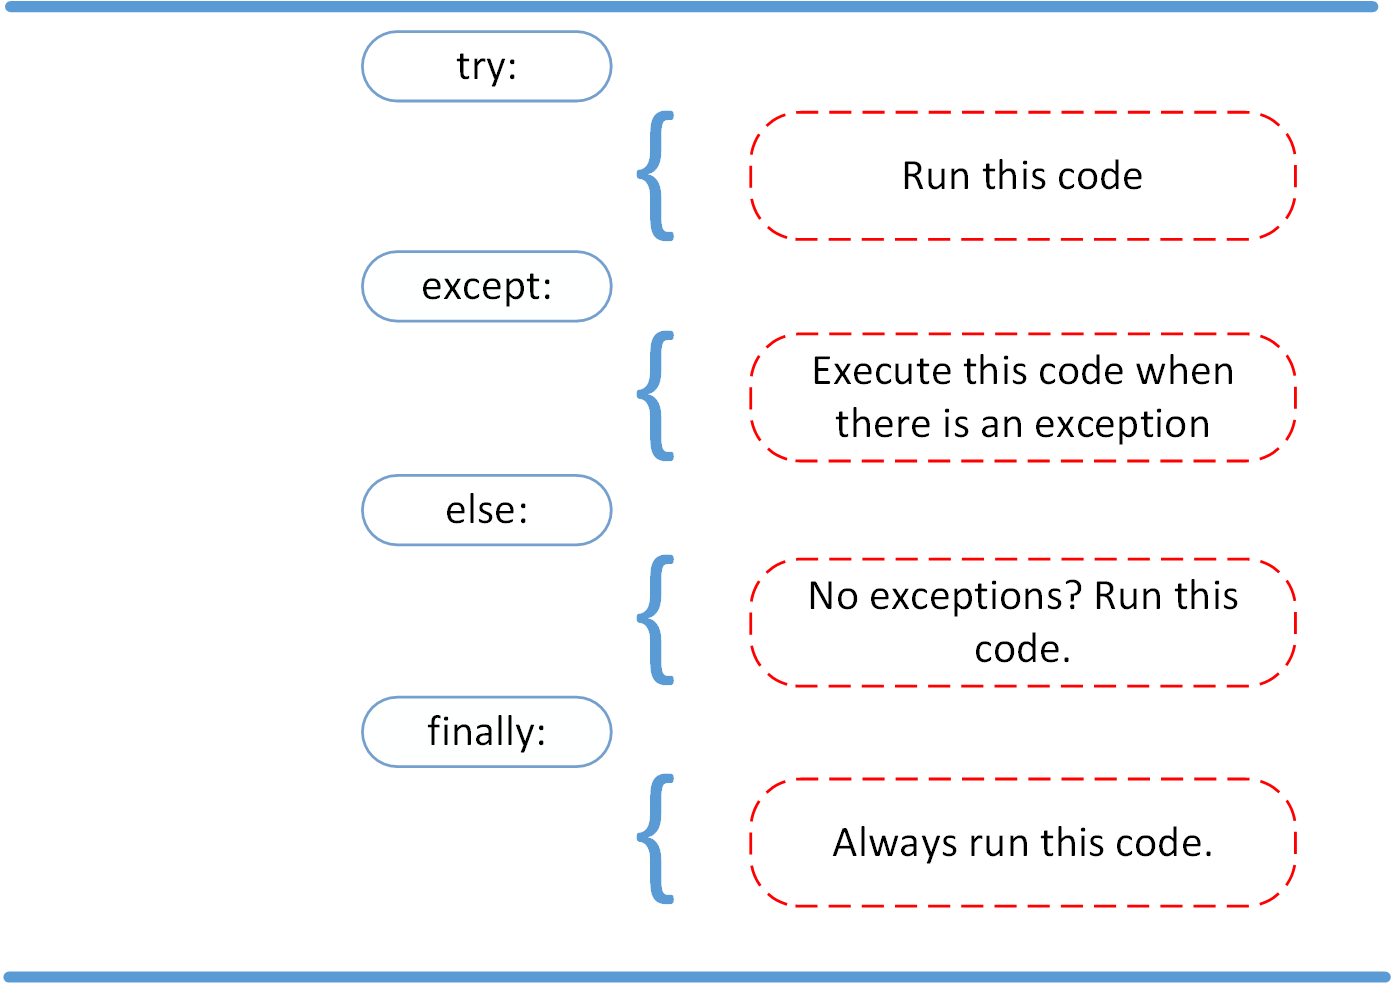

### 1. Manually creating Nested Contexts

In [ ]:
# creating some files
with open('file1.txt', 'w') as f:
    f.writelines('''file1_line1
    file1_line2
    file1_line3''')
with open('file2.txt', 'w') as f:
    f.writelines('''file2_line1
    file2_line2
    file3_line3''')
with open('file3.txt', 'w') as f:
    f.writelines('''file3_line1
    file3_line2
    file3_line3''')

In [ ]:
class NestedContexts:
    def __init__(self):
        self._exits = []
        
    def __enter__(self):
        return self

    def enter_context(self, ctx):
        self._exits.append(ctx.__exit__)
        value = ctx.__enter__()
        return value
        
    def __exit__(self, exc_type, exc_value, exc_tb):
        for exit in self._exits[::-1]:
            exit(exc_type, exc_value, exc_tb)
        return False

In [ ]:
# checking the working of it here
f_names = 'file1.txt', 'file2.txt', 'file3.txt'

with NestedContexts() as stack:
    files = [stack.enter_context(open(f_name)) for f_name in f_names]
    
    while True:
        try:
            rows = [next(f).strip('\n') for f in files]
        except StopIteration:
            break
        else:
            row = ','.join(rows)
            print(row)

file1_line1,file2_line1,file3_line1
    file1_line2,    file2_line2,    file3_line2
    file1_line3,    file3_line3,    file3_line3


### Implimenting Same thing using contextlib library
The contextlib has an ExitStack context manager that works the same way as our NestedContexts, but, unlike our approach, it actually does exception handling properly too!

In [ ]:
from contextlib import ExitStack

In [ ]:
f_names = 'file1.txt', 'file2.txt', 'file3.txt'

with ExitStack() as stack:
    files = [stack.enter_context(open(f_name))
            for f_name in f_names]
    while True:
        try:
            rows = [next(f).strip('\n') for f in files]
        except StopIteration:
            break
        else:
            row = ','.join(rows)
            print(row)

file1_line1,file2_line1,file3_line1
    file1_line2,    file2_line2,    file3_line2
    file1_line3,    file3_line3,    file3_line3


# Section 11 - Project 5

## Goal 1

For this goal, you are given a number of CSV files, each of which have their first row with the field name.

You goal is to create a context manager that you can use to produce the data from each file in a named tuple with field names corresponding to the header row field names.

You should use the csv module's reader function to help with parsing the data.

Your context manager should be generic in the sense that it should just need the file name, no other configuration or hardcoded functionality is required. You do not need to worry about data types for this goal - just return every field as a string.

In addition, your context manager should produce lazy iterators.

Implement this using a class that implements the context manager protocol


### Goal 1 in short Byme: 
1. create a list of named tuple of data from csv files
2. use csv.reader to parse data
3. create generic, lazy context manager class. Implement this using a class that implements the context manager protocol

**input:** filename
**output:** just return every field as a string.


In [ ]:
import requests
import csv
import collections

cars_csv_url = "https://raw.githubusercontent.com/fbaptiste/python-deepdive/main/Part%202/Section%2011%20-%20Project%205/01%20-%20Description/cars.csv"
personal_info_csv_url = "https://raw.githubusercontent.com/fbaptiste/python-deepdive/main/Part%202/Section%2011%20-%20Project%205/01%20-%20Description/personal_info.csv"

In [ ]:
class GenericContextManager:
  def __init__(self, url):
    self.url = url
  
  def parser(self, valueList):
    parsedList = []
    for value in valueList:
      if "." in value:
        try:
          parsedList.append(float(value))
        except ValueError:
          parsedList.append(value)
      else:
        try:
          parsedList.append(int(value))
        except ValueError:
          parsedList.append(value)
    return parsedList

    # reading elements lazily
  def extract_values_in_row(self):
    response = requests.get(self.url)
    lines = response.content.decode().splitlines()
    reader = csv.reader(lines)
    for row in reader:
      if ";" in row[0]:
        yield self.parser(row[0].strip("\n").split(";"))
      else:
        yield self.parser(row)
    # returns list of elements in the row as string

  def __enter__(self):
    return self
  
  def __exit__(self, exc_type, exc_value, exc_tb):
        del self
        return False

In [ ]:
cars_Object = GenericContextManager(cars_csv_url)
personal_info_Object = GenericContextManager(personal_info_csv_url)

# creating namedtuples
cars_rows = cars_Object.extract_values_in_row()
cars_data = collections.namedtuple("cars_data_class", next(cars_rows))   # extracted first row (header) to use as a field in cars_data
personal_info_rows = personal_info_Object.extract_values_in_row()
personal_info_data = collections.namedtuple("personal_info_data_class", next(personal_info_rows))   # extracted first row (header) to use as a field in personal_info_data

In [ ]:
# Create instances of the named tuple class and store them in a list
cars_data_list = [cars_data(*row) for row in cars_rows]
personal_info_data_list = [personal_info_data(*row) for row in personal_info_rows]

In [ ]:
print(cars_data_list)
print(personal_info_data_list)

[cars_data_class(Car='Chevrolet Chevelle Malibu', MPG=18.0, Cylinders=8, Displacement=307.0, Horsepower=130.0, Weight=3504.0, Acceleration=12.0, Model=70, Origin='US'), cars_data_class(Car='Buick Skylark 320', MPG=15.0, Cylinders=8, Displacement=350.0, Horsepower=165.0, Weight=3693.0, Acceleration=11.5, Model=70, Origin='US'), cars_data_class(Car='Plymouth Satellite', MPG=18.0, Cylinders=8, Displacement=318.0, Horsepower=150.0, Weight=3436.0, Acceleration=11.0, Model=70, Origin='US'), cars_data_class(Car='AMC Rebel SST', MPG=16.0, Cylinders=8, Displacement=304.0, Horsepower=150.0, Weight=3433.0, Acceleration=12.0, Model=70, Origin='US'), cars_data_class(Car='Ford Torino', MPG=17.0, Cylinders=8, Displacement=302.0, Horsepower=140.0, Weight=3449.0, Acceleration=10.5, Model=70, Origin='US'), cars_data_class(Car='Ford Galaxie 500', MPG=15.0, Cylinders=8, Displacement=429.0, Horsepower=198.0, Weight=4341.0, Acceleration=10.0, Model=70, Origin='US'), cars_data_class(Car='Chevrolet Impala', M

### testing the working for goal 1, (to compare with goal 2)

In [ ]:
# testing the working for goal 1, (to compare with goal 2)
with GenericContextManager(cars_csv_url) as gcm:
    for row in gcm.extract_values_in_row():
        print(row)

['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']
['Chevrolet Chevelle Malibu', 18.0, 8, 307.0, 130.0, 3504.0, 12.0, 70, 'US']
['Buick Skylark 320', 15.0, 8, 350.0, 165.0, 3693.0, 11.5, 70, 'US']
['Plymouth Satellite', 18.0, 8, 318.0, 150.0, 3436.0, 11.0, 70, 'US']
['AMC Rebel SST', 16.0, 8, 304.0, 150.0, 3433.0, 12.0, 70, 'US']
['Ford Torino', 17.0, 8, 302.0, 140.0, 3449.0, 10.5, 70, 'US']
['Ford Galaxie 500', 15.0, 8, 429.0, 198.0, 4341.0, 10.0, 70, 'US']
['Chevrolet Impala', 14.0, 8, 454.0, 220.0, 4354.0, 9.0, 70, 'US']
['Plymouth Fury iii', 14.0, 8, 440.0, 215.0, 4312.0, 8.5, 70, 'US']
['Pontiac Catalina', 14.0, 8, 455.0, 225.0, 4425.0, 10.0, 70, 'US']
['AMC Ambassador DPL', 15.0, 8, 390.0, 190.0, 3850.0, 8.5, 70, 'US']
['Citroen DS-21 Pallas', 0, 4, 133.0, 115.0, 3090.0, 17.5, 70, 'Europe']
['Chevrolet Chevelle Concours (sw)', 0, 8, 350.0, 165.0, 4142.0, 11.5, 70, 'US']
['Ford Torino (sw)', 0, 8, 351.0, 153.0, 4034.0, 11.0, 70, 

## Goal 2
The goal is to reproduce the work you did in Goal 1, but using a generator function and the `contextlib` `contextmanager` decorator.

### Goal 2 byme:
just remove `__enter__` and `__exit__`. Then impliment the same thing using try and finally blocks like below. You can also transfer some `__init__` code in some cases.
```
@contextmanager
def some_generator(<arguments>):
    <copy __init__ code here>
    try:
      <copy __enter__ code here>
    finally:
      <copy __exit__ code here>
```

Note byme:
Since, `__enter__` and `__exit__` are not implimented in `GenericContextManager2` class, so you cannot use `with` here.
You can use `with` only with the `some_generator` function defined outside the class with `@contextmanager` decorator

### Useful info from help(contextlib)
```
   contextmanager(func)
        @contextmanager decorator.
```
Typical usage:
```        
            @contextmanager
            def some_generator(<arguments>):
                <setup>
                try:
                    yield <value>
                finally:
                    <cleanup>
```        
This makes this:
```        
            with some_generator(<arguments>) as <variable>:
                <body>
```        
equivalent to this:
```        
            <setup>
            try:
                <variable> = <value>
                <body>
            finally:
                <cleanup>
```

In [ ]:
import requests
import csv
from contextlib import contextmanager
import collections

cars_csv_url = "https://raw.githubusercontent.com/fbaptiste/python-deepdive/main/Part%202/Section%2011%20-%20Project%205/01%20-%20Description/cars.csv"
personal_info_csv_url = "https://raw.githubusercontent.com/fbaptiste/python-deepdive/main/Part%202/Section%2011%20-%20Project%205/01%20-%20Description/personal_info.csv"

In [ ]:
# finished goal 2 in this cell

class GenericContextManager2:
  def __init__(self, url):
    self.url = url
  
  def parser(self, valueList):
    parsedList = []
    for value in valueList:
      if "." in value:
        try:
          parsedList.append(float(value))
        except ValueError:
          parsedList.append(value)
      else:
        try:
          parsedList.append(int(value))
        except ValueError:
          parsedList.append(value)
    return parsedList

  # reading elements lazily
  def extract_values_in_row(self):
    response = requests.get(self.url)
    lines = response.content.decode().splitlines()
    reader = csv.reader(lines)
    for row in reader:
      if ";" in row[0]:
        yield self.parser(row[0].strip("\n").split(";"))
      else:
        yield self.parser(row)
    # returns list of elements in the row as string






# deleted __enter__ and __exit__. Now implimenting the context manager functionality outside the class
@contextmanager
def OutsideContextManagerImplimentation2(url):
  GCM2_Obj = GenericContextManager2(url)    # deleting (self.url = url) will change the working. so, not deleting __init__
  try:
    yield GCM2_Obj
  finally:
    del GCM2_Obj

### testing if the working of goal 2 is same as goal 1

In [ ]:
# testing if the working is same
with OutsideContextManagerImplimentation2(cars_csv_url) as gcm:
    for row in gcm.extract_values_in_row():
        print(row)

['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']
['Chevrolet Chevelle Malibu', 18.0, 8, 307.0, 130.0, 3504.0, 12.0, 70, 'US']
['Buick Skylark 320', 15.0, 8, 350.0, 165.0, 3693.0, 11.5, 70, 'US']
['Plymouth Satellite', 18.0, 8, 318.0, 150.0, 3436.0, 11.0, 70, 'US']
['AMC Rebel SST', 16.0, 8, 304.0, 150.0, 3433.0, 12.0, 70, 'US']
['Ford Torino', 17.0, 8, 302.0, 140.0, 3449.0, 10.5, 70, 'US']
['Ford Galaxie 500', 15.0, 8, 429.0, 198.0, 4341.0, 10.0, 70, 'US']
['Chevrolet Impala', 14.0, 8, 454.0, 220.0, 4354.0, 9.0, 70, 'US']
['Plymouth Fury iii', 14.0, 8, 440.0, 215.0, 4312.0, 8.5, 70, 'US']
['Pontiac Catalina', 14.0, 8, 455.0, 225.0, 4425.0, 10.0, 70, 'US']
['AMC Ambassador DPL', 15.0, 8, 390.0, 190.0, 3850.0, 8.5, 70, 'US']
['Citroen DS-21 Pallas', 0, 4, 133.0, 115.0, 3090.0, 17.5, 70, 'Europe']
['Chevrolet Chevelle Concours (sw)', 0, 8, 350.0, 165.0, 4142.0, 11.5, 70, 'US']
['Ford Torino (sw)', 0, 8, 351.0, 153.0, 4034.0, 11.0, 70, 

## Verified ! Both the goals are achieved

## Some more important stuff from this section
Link: https://github.com/fbaptiste/python-deepdive/tree/main/Part%202/Section%2011%20-%20Project%205


In [ ]:
# creating file
with open('file1.txt', 'w') as f:
    f.writelines('''file1_line1
    file1_line2
    file1_line3''')

In [ ]:
with open('file1.txt') as f:
    print('---', f.read(8))
    print('---', f.read(12))
    print("moving file pointer to char 0")
    f.seek(0)
    print('---', f.read(5))

--- file1_li
--- ne1
    file
moving file pointer to char 0
--- file1


# Section 12 - Generator Based Coroutines

## 01 - Coroutines.ipynb

### Definition of Coroutines:

Coroutines are a type of Python function that allows a function to be paused and resumed at a later point. They enable cooperative multitasking, which means that the programmer explicitly decides when to switch between tasks. Coroutines use the `yield` statement to pause execution and transfer control back to the caller, and they can also receive data from the caller using the `send()` method. Coroutines are useful for applications that involve managing multiple tasks simultaneously, such as I/O-bound applications.

The `queue` module has some queue implementations, including some very specialized ones. In Python 3.7, it also has the `SimpleQueue` class that is more lightweight.

In this case though, I'm going to use the `deque` class (double-ended queue) from the `collections` module - it is very efficient adding and removing elements from both the start and the end of the `queue` - so, it's very general purpose and widely used. The `queue` implementations are more specialized and have several features useful for multi-tasking that we won't actually need.

In [ ]:
from collections import deque

We can specify a maximum size for the queue when create it - this allows us to limit the number of items in the queue.

We can then add and remove items by using the methods:

* `append`: appends an element to the right of the queue
* `appendleft`: appends an element to the left of the queue
* `pop`: remove and return the element at the very right of the queue
* `popleft`: remove and return the element at the very left of the queue


In [ ]:
dq = deque([1, 2, 3, 4, 5], maxlen = 20)
dq.append(100)
dq.appendleft(-10)
dq

deque([-10, 1, 2, 3, 4, 5, 100])

In [ ]:
dq.pop() # pops from right

100

In [ ]:
dq.popleft()

-10

### Some Measurements using timeit() for 1000 integers (1 to 999):
1. append to deque : 0.87 sec
2. insert front of deque : 0.84 sec
3. pop from deque : 0.53 milli sec
4. pop from front of deque : 0.52 milli sec

**Observation:**
Popping from double ended queue is much faster than appending elements.

### manually creating a coroutine

In [ ]:
def produce_elements(dq, n):
    for i in range(1, n):
        dq.appendleft(i)
        if len(dq) == dq.maxlen:
            print('\t queue full - yielding control')
            yield
        
def consume_elements(dq):
    while True:
        while len(dq) > 0:
            print('\t processing ', dq.pop())
        print('\t queue empty - yielding control')
        yield
    
def coordinator():
    dq = deque(maxlen=10)
    producer = produce_elements(dq, 36)
    consumer = consume_elements(dq)
    while True:
        try:
            print('producing...')
            next(producer)
        except StopIteration:
            # producer finished
            break
        finally:
            print('consuming...')
            next(consumer)

In [ ]:
coordinator()

producing...
	 queue full - yielding control
consuming...
	 processing  1
	 processing  2
	 processing  3
	 processing  4
	 processing  5
	 processing  6
	 processing  7
	 processing  8
	 processing  9
	 processing  10
	 queue empty - yielding control
producing...
	 queue full - yielding control
consuming...
	 processing  11
	 processing  12
	 processing  13
	 processing  14
	 processing  15
	 processing  16
	 processing  17
	 processing  18
	 processing  19
	 processing  20
	 queue empty - yielding control
producing...
	 queue full - yielding control
consuming...
	 processing  21
	 processing  22
	 processing  23
	 processing  24
	 processing  25
	 processing  26
	 processing  27
	 processing  28
	 processing  29
	 processing  30
	 queue empty - yielding control
producing...
consuming...
	 processing  31
	 processing  32
	 processing  33
	 processing  34
	 processing  35
	 queue empty - yielding control


## 02 - Generator States.ipynb

a generator can be in one of four states:

* created
* running
* suspended
* closed


### Checking generator state

In [ ]:
def gen(s):
    for c in s:
        print("2.", getgeneratorstate(g))
        yield c

In [ ]:
from inspect import getgeneratorstate

# Creating gen
g = gen('abc')
print("1.", getgeneratorstate(g), "\n")

# comleting one iteration of generator
print(next(g))
print("3.", getgeneratorstate(g), "\n")
print(next(g))
print("3.", getgeneratorstate(g), "\n")
print(next(g))
print("3.", getgeneratorstate(g), "\n")

# closing gen
print(next(g))
print("4.", getgeneratorstate(g), "\n")

1. GEN_CREATED 

2. GEN_RUNNING
a
3. GEN_SUSPENDED 

2. GEN_RUNNING
b
3. GEN_SUSPENDED 

2. GEN_RUNNING
c
3. GEN_SUSPENDED 



StopIteration: ignored

In [ ]:
print("4.", getgeneratorstate(g), "\n")

4. GEN_CLOSED 



once the generator returns (not yields), i.e. the StopIteration is raised, the generator is closed.

* `yield` suspends gen
* `return` closes gen

## 03 - Generator States.ipynb

(same as 02 - Generator States.ipynb)

## 04 - Sending Data To Generators.ipynb

We can send data to the suspended generator (and resume running it) by using the `send()` method of the generator (instead of just using the `next()` method)

In [ ]:
def echo():
    while True:
        received = yield
        print('You said:', received)

e = echo()
getgeneratorstate(e)

'GEN_CREATED'

In [ ]:
next(e)

You said: None


In [ ]:
e.send('python')

You said: python


In [ ]:
next(e)

You said: None


### Working

Code:
```
def gen():
    value = yield  x
```

When the function `gen()` is called, it will pause at the `yield` statement and return the value of `x`. At this point, the function execution is suspended, and the caller of the function can obtain the value of `x`.

`gen.send("abcd")` assigns "abcd" to `value` if 



### Better example
In other words, the `send()` method can only update `value` if it is used immediately after a `yield` statement with ` value =`.

In [ ]:
def my_generator():
    value = yield "First"           # Note: (yield "First") returns "First" and suspends gen. 
                                    # Then send("Hello") re-runs it, and element recieved by (yield "First") is assigned to value variable ("Hello")

    yield f"You entered: {value}"   # Then value variable is returned
    yield "Done!"                   # And Now value of value variable does not change since assignment (value = yield ...) is not used
    yield f"last yield value: {value}"

gen = my_generator()

# Get the first value
print(next(gen))  # Output: "First"

# Send a value and get the next value
print(gen.send("Hello"))  # Output: "You entered: Hello"

# Send a value and get the next value
print(gen.send("Aditya"))  # Output: "Done!"

# Get the next value
print(next(gen))  # Output: "last yield value: Hello"

First
You entered: Hello
Done!
last yield value: Hello


## 05 - Closing Generators

Generators can be closed using `gen.close()` method.

### IMP BYME: download file from github raw url link

In [ ]:
# download file from url link
import requests
def make_file(file_name, url):
  with open(file_name, "wb") as f:
    f.write(requests.get(url).content)

### IMP: Using sniff to check format of a csv file and sending it to csv.reader for parsing.

Note: If file is empty, `csv.Sniffer().sniff(f.read(2000))` will be unable to determine dialect, so it will raise `Error: Could not determine delimiter`

In [ ]:
from inspect import getgeneratorstate
import csv

cars_csv_url = "https://raw.githubusercontent.com/fbaptiste/python-deepdive/main/Part%202/Section%2012%20-%20Generator%20Based%20Coroutines/05%20-%20Closing%20Generators/cars.csv"
make_file("cars.csv", cars_csv_url)

def parse_file(f_name):
    print('opening file...')
    f = open(f_name, 'r')
    try:
        dialect = csv.Sniffer().sniff(f.read(2000))    # sniff just determines the format of csv file and 2000 means 2000Bytes (dialect means उपभाषा)
        f.seek(0)                                      # set file pointer f to 0 (first element)
        next(f)                                        # skip header row
        reader = csv.reader(f, dialect=dialect)
        for row in reader:
            yield row
    except Exception as ex:
        print('some exception occurred', str(ex))
    except GeneratorExit:
        print('GeneratorExit Exception Occured! \t Generator was closed!')
    finally:
        print('cleaning up...')
        f.close()   

### IMP: Printing some lines of a csv file

In [ ]:
import itertools

parse_file_Obj = parse_file('cars.csv')
for row in itertools.islice(parse_file_Obj, 5):
    print(row)

opening file...
['Chevrolet Chevelle Malibu', '18.0', '8', '307.0', '130.0', '3504.', '12.0', '70', 'US']
['Buick Skylark 320', '15.0', '8', '350.0', '165.0', '3693.', '11.5', '70', 'US']
['Plymouth Satellite', '18.0', '8', '318.0', '150.0', '3436.', '11.0', '70', 'US']
['AMC Rebel SST', '16.0', '8', '304.0', '150.0', '3433.', '12.0', '70', 'US']
['Ford Torino', '17.0', '8', '302.0', '140.0', '3449.', '10.5', '70', 'US']
Generator was closed!
cleaning up...


In [ ]:
parse_file_Obj.close()  # gen.close() will cause GeneratorExit exception to close the gen

GeneratorExit Exception Occured! 	 Generator was closed!
cleaning up...


Here's what the Python docs have to say about that:

**generator.close()**

*Raises a GeneratorExit at the point where the generator function was paused. If the generator function then exits gracefully, is already closed, or raises GeneratorExit (by not catching the exception), close returns to its caller. If the generator yields a value, a RuntimeError is raised. If the generator raises any other exception, it is propagated to the caller. close() does nothing if the generator has already exited due to an exception or normal exit.*


## 06 - Sending Exceptions to Generators.ipynb

Use `gen.throw(EXCEPTION, MESSAGE)` to make generator throw Exception/Error

In [ ]:
def gen():
    try:
        while True:
            received = yield
            print(received)
    except ValueError:
        print('received the value error...')
    finally:
        print('generator exiting and closing')

In [ ]:
g = gen()

next(g)
g.send('hello')

hello


In [ ]:
g.throw(ValueError, 'custom message')

received the value error...
generator exiting and closing


StopIteration: ignored

### Working of `throw()`

1. If the generator catches the exception and yields a value,

  that value is returned by the `throw()` method. 
  
  For example, consider the following code:

 *(Agar generator exception catch karke koi value return karta hai, toh vo value pass ho jaati hau throw ke output pe)*

In [ ]:
def gen():
    while True:
        try:
            x = yield
        except ValueError:
            yield "Got a ValueError"

In [ ]:
g = gen()
next(g)
g.throw(ValueError, "message of ValueError")

'Got a ValueError'

If you call `gen()` to create a generator object and then call its `throw()` method with a `ValueError`, the generator catches the exception and yields the string `"Got a ValueError"`.

2. If the generator does not catch the exception,

  the exception is passed back to the caller of the `throw()` method. 
  
  For example (below):

  *(agar generator exception catch nahi karta, toh exception aa jaata hai output pe.)*

In [ ]:
def gen():
    while True:
        x = yield

In [ ]:
g = gen()
next(g)
g.throw(ValueError, "message of ValueError")

ValueError: ignored

3. If the generator catches the exception and then exits (`return`s),
  
   a `StopIteration` exception is raised to signal the end of the generator.
  
  For example:

  *(agar generator exception catch kar leta hai, aur `return` karta hai kuch, toh `StopIteration` raise ho jaata hai.)*

In [ ]:
def gen():
    try:
        while True:
            x = yield
    except ValueError:
        pass

In [ ]:
g = gen()
next(g)
g.throw(ValueError, "message of ValueError")

StopIteration: ignored

If you call `gen()` to create a generator object `g` and then call its `throw()` method with a `ValueError`, the generator catches the exception and then exits. When the generator exits, a `StopIteration` exception is raised to signal that the generator is finished.

4. If the generator catches the exception and raises another exception, 

  that new exception is passed back to the caller of the `throw()` method. 
  
  For example:

  *(agar generator `exception` catch karke `dusra_exception` raise karta hai, toh `dusra_exception` `return` hota hai `throw()` ko)*

In [ ]:
def gen():
    try:
        while True:
            x = yield
    except ValueError:
        raise TypeError("Got a ValueError, but raised a TypeError instead!")

In [ ]:
g = gen()
next(g)
g.throw(ValueError, "message of ValueError")

TypeError: ignored

If you call `gen()` to create a generator object `g` and then call its `throw()` method with a `ValueError`, the generator catches the exception and then raises a `TypeError` with a message. The TypeError is then passed back to the caller of the `throw()` method.

### Writing our own exceptions


```
class CommitException(Exception):
    pass

class RollbackException(Exception):
    pass
```

and we can `raise` these using `raise CommitException`. We can also use these with `except` in `try... except block`



### Note: throw() and close()

The `close()` method does essentially the same thing as `throw(GeneratorExit)` except that when that exception is thrown using `throw()`, Python does not silence the exception for the caller

## 07 - Using Decorators to Prime Coroutines.ipynb

Decorator must be able to get the generator in a suspended state.
Essentially we want to be able to:
1. create the coroutine (`gen()`)
2. prime the coroutine (`next(g)`)


In [ ]:
# creating decorator
def coroutine_decorator(gen_fn):
    def inner(*args, **kwargs):
        gen = gen_fn(*args, **kwargs)     # Starting Generator
        next(gen)                         # Priming generator
        return gen
    return inner

In [ ]:
#Checking the working of decorator

@coroutine_decorator
def echo_gen():
    while True:
        received = yield
        print(received)

In [ ]:
g = echo_gen()

In [ ]:
import inspect
inspect.getgeneratorstate(g)   # Verified! suspended state of decorator

'GEN_SUSPENDED'

## 08 - Yield From - Two-Way Communications.ipynb

In [ ]:
def squares(n):
    for i in range(n):
        yield i**2

In [ ]:
def delegator():
    yield from squares(5)
    yield "Done!"

Note: a subgenerator is a generator that is delegated to by another generator

So, in above example, `squares(5)` is acting as subgenerator for `delegator` generator.

## 09 - Yield From - Sending Data.ipynb

Nothing important here

## 10 - Yield From - Closing and Return.ipynb

In [ ]:
def subgen():
    try:
        while True:
            received = yield
            print(received)
    finally:
        print('subgen: closing...')

def delegator():
    s = subgen()
    yield from s
    yield 'delegator: subgen closed'
    print('delegator: closing...')

In [ ]:
d = delegator()
next(d)

In [ ]:
from inspect import getgeneratorstate, getgeneratorlocals
s = getgeneratorlocals(d)['s']                 # IMP: Get local items of generator outside the generator
print(getgeneratorstate(d))
print(getgeneratorstate(s))

GEN_SUSPENDED
GEN_SUSPENDED


In [ ]:
d.close()                     # closing delegator
print(getgeneratorstate(d))
print(getgeneratorstate(s))   # results in closed subgenerator also

subgen: closing...
GEN_CLOSED
GEN_CLOSED


Note: closing the delegator will close not only the delegator itself, but also close the currently active subgenerator (if any).

## 11 - Yield From - Throwing Exceptions

difference between throw and close is that although close causes an exception to be raised in the generator, Python essentially silences it.

We can catch the exception in the delegator like shown below:

```
def delegator():
    try:
        yield from echo()
    except ValueError:
        print('got the value error')
```


## 12 - Pipelines - Pulling Data

(Nothing important, just pull data using `with open(file) as f` in generators to pull data)

## 13 - Pipelines - Pushing Data.ipynb

Pipeline of generators looks like below:
```
print_data = handle_data()
filtered = filter_even(print_data)
gen2 = power_up(3, filtered)
gen1 = power_up(2, gen2)

# pipeline: gen1 --> gen2 --> filtered --> print_data

for i in range(1, 6):
    gen1.send(i)
```

OUTPUT:
```
64.0
4096.0
```

## 14 - Pipelines - Broadcasting

Note: You can read the codes using below link. Those are quite good. Especially `pipeline_coro`

LINK: https://github.com/fbaptiste/python-deepdive/blob/main/Part%202/Section%2012%20-%20Generator%20Based%20Coroutines/14%20-%20Pipelines%20-%20Broadcasting/Pipelines%20-%20Broadcasting.ipynb

### Some imp text form .ipynb

we're going to create a filter coroutine that will have the following parameters:

* filter function (predicate)
* next coroutine to send to in the pipeline

That filter coroutine will receive a data row and test if the predicate applied to that data row is True. If it is, it will send the row to the next stage (target) of the pipeline, otherwise it just ignores the data row.

### Broadcasting data

```
def broadcast(targets):
    while True:
        data_row = yield
        for target in targets:
            target.send(data_row)
```

Broadsting can be done like this.

```
     data                      
      |                      |--> filter --> save
      v                      |
process_data --> broadcast --|--> filter --> save
                             |
                             |--> filter --> save

```

# Section 13 - Project 6


## Project 6 - Description

The goal of this project is to rewrite the pull pipeline we created in the **Application - Pipelines - Pulling** video in the **Generators as Coroutines** section.

You should look at the techniques we used in the **Application - Pipelines - Broadcasting** video and apply them here.

The goal is to write a pipeline that will push data from the source file, `cars.csv`, and push it through some filters and a save coroutine to ultimately save the results as a csv file.

Try to make your code as generic as possible, and don't worry about column headers in the output file (unless you really want to!).

When you are done with your solution you should be able to specify an arbitrary number of filters on the name field.

If you specify `Chevrolet`, `Carlo` and `Landau` for three filters, your output file should contain two lines of data only:

```
Chevrolet Monte Carlo Landau,15.5,8,350.0,170.0,4165.,11.4,77,US
Chevrolet Monte Carlo Landau,19.2,8,305.0,145.0,3425.,13.2,78,US
```

Good luck!!


## In short, BYME:

* cars.csv ---> processing(generators and coroutines) ---> filtered_cars.csv

* Try to make your code as generic as possible

* you should be able to specify an arbitrary number of filters on the name field

  Eg. You can specify `Chevrolet`, `Carlo` and `Landau` for three filters

In [89]:
# download file from url link
import requests
def make_file(file_name, url):
  with open(file_name, "wb") as f:
    f.write(requests.get(url).content)

cars_csv_url = "https://raw.githubusercontent.com/fbaptiste/python-deepdive/main/Part%202/Section%2013%20-%20Project%206/01%20-%20Project%20Description/cars.csv"
make_file( file_name = "cars.csv", url = cars_csv_url)

In [90]:
# parsing list of elements in row (NOT WORKING DELIMITER ERROR)

import csv

def parse_file(f_name, size_for_sniff_Bytes = 2000):
    print('opening file...')
    f = open(f_name, 'r')
    try:
        dialect = csv.Sniffer().sniff(f.read(size_for_sniff_Bytes))    # sniff just determines the format of csv file and 2000 means 2000Bytes (dialect means उपभाषा)
        f.seek(0)                                      # set file pointer f to 0 (first element)
        next(f)                                        # skip header row
        reader = csv.reader(f, dialect=dialect)
        for row in reader:
            yield row
    except Exception as ex:
        print('some exception occurred', str(ex))
    except GeneratorExit:
        print('GeneratorExit Exception Occured! \t Generator was closed!')
    finally:
        print('cleaning up...')
        f.close()

cars_parsed_row_gen = parse_file("cars.csv")

In [91]:
# Printing to see if elements works fine
import itertools
parse_file_Obj = parse_file('cars.csv')
for row in itertools.islice(parse_file_Obj, 5):
    print(row)

opening file...
['Chevrolet Chevelle Malibu', '18.0', '8', '307.0', '130.0', '3504.', '12.0', '70', 'US']
['Buick Skylark 320', '15.0', '8', '350.0', '165.0', '3693.', '11.5', '70', 'US']
['Plymouth Satellite', '18.0', '8', '318.0', '150.0', '3436.', '11.0', '70', 'US']
['AMC Rebel SST', '16.0', '8', '304.0', '150.0', '3433.', '12.0', '70', 'US']
['Ford Torino', '17.0', '8', '302.0', '140.0', '3449.', '10.5', '70', 'US']
GeneratorExit Exception Occured! 	 Generator was closed!
cleaning up...


In [68]:
# filter funtion: return only rows that contains all the list elements passed list element from the list
def filter_fn(must_be_present_list):
  with open("filtered_cars.csv", "w") as f:
    for row in cars_parsed_row_gen:
      if all(element in row[0].split(" ") for element in must_be_present_list):
        f.write(str(row)[1:-1].replace("'", "")+"\n")   #List to string Parser

In [69]:
filter_fn(["Chevrolet", "Carlo", "Landau"])

# checking elements in filtered file
# Printing to see if elements works fine
with open("filtered_cars.csv", "r") as f:
  lines = f.readlines()
  for line in lines:
    print(line, end="")

opening file...
cleaning up...
Chevrolet Monte Carlo Landau, 15.5, 8, 350.0, 170.0, 4165., 11.4, 77, US
Chevrolet Monte Carlo Landau, 19.2, 8, 305.0, 145.0, 3425., 13.2, 78, US


**OUTPUT GOOD ! PROJECT COMPLETED !**

## Try 2 (using send and yield)

In [96]:
cars_parsed_row_gen = parse_file("cars.csv")  # redefining gen since it empties itself after every run

In [97]:
# Writer fn
def writer_gen(file_name):
  with open(file_name, "w") as f:
    while True:
      row = yield        # GETS LIST
      f.write(row)

In [98]:
# filter funtion: return only rows that contains all the list elements passed list element from the list
def filter_fn_2(must_be_present_list):
  w = writer_gen("filtered_cars_2.csv")   # starting gen
  next(w)                                 # priming gen
  for row in cars_parsed_row_gen:
    if all(element in row[0].split(" ") for element in must_be_present_list):  # checking if name element in row contains all elements of must_be_present_list
      w.send(str(row)[1:-1].replace("'", "")+"\n")                             # List to string Parsing logic 

In [99]:
filter_fn_2(["Chevrolet", "Carlo", "Landau"])

# checking elements in filtered file
# Printing to see if elements works fine
with open("filtered_cars_2.csv", "r") as f:
  lines = f.readlines()
  for line in lines:
    print(line, end="")

opening file...
cleaning up...
Chevrolet Monte Carlo Landau, 15.5, 8, 350.0, 170.0, 4165., 11.4, 77, US
Chevrolet Monte Carlo Landau, 19.2, 8, 305.0, 145.0, 3425., 13.2, 78, US


**OUTPUT GOOD ! PROJECT COMPLETED !**

## Try 3: Using coroutine decorators

In [100]:
cars_parsed_row_gen = parse_file("cars.csv")  # redefining gen since it empties itself after every run

By using decorator we are basically replicating:
```
@decorator
def fn(*args, **kwargs):
...
...
```
above represents same as `decorator(fn(*args, **kwargs))`

In [101]:
def coroutine_decorator(decorated_fn):
  def inner_temp_fn(*args, **kwargs):
    temp_obj = decorated_fn(*args, **kwargs)   # creating dec
    next(temp_obj)                             # priming dec
    return temp_obj
  return inner_temp_fn

In [102]:
# Writer fn

@coroutine_decorator
def writer_gen_3(file_name):
  with open(file_name, "w") as f:
    while True:
      row = yield        # GETS LIST
      f.write(row)

In [103]:
# filter funtion: return only rows that contains all the list elements passed list element from the list
def filter_fn_3(must_be_present_list):
  w = writer_gen_3("filtered_cars_3.csv")   # starting gen
  for row in cars_parsed_row_gen:
    if all(element in row[0].split(" ") for element in must_be_present_list):  # checking if name element in row contains all elements of must_be_present_list
      w.send(str(row)[1:-1].replace("'", "")+"\n")                             # List to string Parsing logic 

In [104]:
filter_fn_3(["Chevrolet", "Carlo", "Landau"])

# checking elements in filtered file
# Printing to see if elements works fine
with open("filtered_cars_3.csv", "r") as f:
  lines = f.readlines()
  for line in lines:
    print(line, end="")

opening file...
cleaning up...
Chevrolet Monte Carlo Landau, 15.5, 8, 350.0, 170.0, 4165., 11.4, 77, US
Chevrolet Monte Carlo Landau, 19.2, 8, 305.0, 145.0, 3425., 13.2, 78, US


**OUTPUT GOOD ! PROJECT COMPLETED !**

# Section 14 - Python Updates

In [124]:
!python --version

Python 3.9.16


In [117]:
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done


In [119]:
! apt-get full-upgrade -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Calculating upgrade... Done
The following packages have been kept back:
  libcudnn8 libcudnn8-dev libnccl-dev libnccl2
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [122]:
!apt-get install python3.11 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.11 is already the newest version (3.11.3-1+focal1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


## 01 - Relevant Python 3.10 Changes.ipynb

### match - case
(acts just like switch case in c, with `_` as default case)

In [123]:
def response_of_match_case(language):
    match language:
        case "Java":
            return "Hmm, coffee!"
        case "Python":
            return "I'm not scared of snakes!"
        case _:
            return "default case"

SyntaxError: ignored

In [106]:
response_of_match_case("Python")

NameError: ignored

In [107]:
response_of_match_case("akdakjsfnn")       # check default case

NameError: ignored

Since, Colab still runs on `Python 3.9.16` and is unable to upgrade,
so, i cannot try these.

Just read using below link for updates:
https://github.com/fbaptiste/python-deepdive/tree/main/Part%202/Section%2014%20-%20Python%20Updates